In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/optimizer_compare/

/content/drive/MyDrive/optimizer_compare


In [1]:
!nvidia-smi

Tue Aug  5 08:26:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             43W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [3]:
import tensorflow as tf
import keras
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

In [4]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

import matplotlib.pyplot as plt

def show_random_examples(images, labels, num_examples=25, figsize=(10, 10)):
    indices = np.random.choice(len(images), num_examples, replace=False)
    plt.figure(figsize=figsize)
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx], cmap='gray')
        plt.xlabel(labels[idx])
    plt.show()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [6]:
#show_random_examples(X_train, y_train)

In [5]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# normalize
X_train_full = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one-hot encoding
y_train_full = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.15,
    random_state=42,
    stratify=y_train_full.argmax(axis=1)
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (42500, 32, 32, 3)
y_train shape: (42500, 10)
X_val shape: (7500, 32, 32, 3)
y_val shape: (7500, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [106]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

# Model oluşturma
def create_model():
  inputs = Input(shape=(32,32,3))

  # blok 1
  # x = Conv2D(32, (3, 3), kernel_regularizer=l2(1e-4))(inputs)
  # x = BatchNormalization()(x)
  # x = Activation('relu')(x)
  # x = MaxPooling2D(pool_size=(2, 2))(x)

  # # blok 2
  # x = Conv2D(64, (3, 3), kernel_regularizer=l2(1e-4))(x)
  # x = BatchNormalization()(x)
  # x = Activation('relu')(x)
  # x = MaxPooling2D(pool_size=(2, 2))(x)

  # # blok 3
  # x = Conv2D(64, (3, 3))(x)
  # x = BatchNormalization()(x)
  # x = Activation('relu')(x)
  # x = MaxPooling2D(pool_size=(2, 2))(x)

  x = Conv2D(32, (3, 3), kernel_regularizer=l2(1e-4))(inputs)
  x = Conv2D(32, (3, 3), kernel_regularizer=l2(1e-4))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)

  x = Conv2D(64, (3, 3), kernel_regularizer=l2(1e-4))(x)
  x = Conv2D(64, (3, 3), kernel_regularizer=l2(1e-4))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)


  x = Flatten()(x)

  x = Dense(256, kernel_regularizer=l2(1e-4))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.5)(x)

  x = Dense(128, kernel_regularizer=l2(1e-4))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.5)(x)

  outputs = Dense(10, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=outputs)
  return model

In [107]:
create_model().summary()

Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_52 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_156 (Conv2D)             │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_157 (Conv2D)             │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_258         │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_258 (Activation)     │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 14, 14, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_158 (Conv2D)             │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_159 (Conv2D)             │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_259         │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_259 (Activation)     │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_115               │ (None, 5, 5, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_51 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_260         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_260 (Activation)     │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_186 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_261         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_261 (Activation)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_187 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511,530 (1.95 MB)

 Trainable params: 510,570 (1.95 MB)

 Non-trainable params: 960 (3.75 KB)

In [108]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

optimizers = {
    "Adam": Adam(learning_rate = 1e-3),
    "RMSprop": RMSprop(learning_rate = 1e-3),
    "SGD": SGD(learning_rate = 1e-3)
}

In [109]:
def train_and_evaluate(optimizer, name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Modeli sıfırdan oluştur
    model = create_model()

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Callbacks
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=7,
        restore_best_weights=True,
        min_delta=0.001,
    )

    checkpoint = ModelCheckpoint(
        filepath=f"/content/drive/MyDrive/optimizer_compare/best_model{name}.keras",  # her optimizer için farklı dosya
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose = 0
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        mode='min',
        verbose = 0
    )

    # # data augmentation
    # datagen = ImageDataGenerator(
    #     rotation_range=15,
    #     width_shift_range=0.1,
    #     height_shift_range=0.1,
    #     horizontal_flip=True,
    #     vertical_flip=False,
    #     fill_mode='nearest',
    #     zoom_range=0.1
    # )

    # datagen.fit(X_train, seed = 42)

    print(f"\n Training with {name}...\n")

    history = model.fit(
        X_train, y_train,
        batch_size=32,
        # datagen.flow(X_train, y_train, batch_size=64),
        validation_data=(X_val, y_val),
        epochs=50,
        callbacks=[early_stop, checkpoint, reduce_lr],
        #steps_per_epoch=X_train.shape[0] // 64,
    )

    test_loss, test_acc = model.evaluate(X_test, y_test)

    return {
        'name': name,
        'history': history,
        'test_accuracy': test_acc,
        'test_loss': test_loss
    }



In [110]:
results = []

for name, opt in optimizers.items():
    result = train_and_evaluate(opt, name, X_train, y_train, X_val, y_val, X_test, y_test)
    results.append(result)

for r in results:
    print(f"\n{r['name']}: Test Accuracy = {r['test_accuracy']:.4f}, Test Loss = {r['test_loss']:.4f}")


 Training with Adam...

Epoch 1/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3292 - loss: 2.0062 - val_accuracy: 0.5777 - val_loss: 1.2713 - learning_rate: 0.0010
Epoch 2/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5644 - loss: 1.3351 - val_accuracy: 0.6481 - val_loss: 1.1072 - learning_rate: 0.0010
Epoch 3/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6298 - loss: 1.1912 - val_accuracy: 0.6436 - val_loss: 1.1394 - learning_rate: 0.0010
Epoch 4/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6578 - loss: 1.1208 - val_accuracy: 0.6047 - val_loss: 1.2590 - learning_rate: 0.0010
Epoch 5/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6833 - loss: 1.0807 - val_accuracy: 0.6205 - val_loss: 1.2509 - learning_rate: 0.0010
Epoch 6/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7240 - loss: 0.9793 - val_accuracy: 0.7447 - val_loss: 0.8965 - learning_rate: 5.0000e-04
Epoch 7/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 6s 4

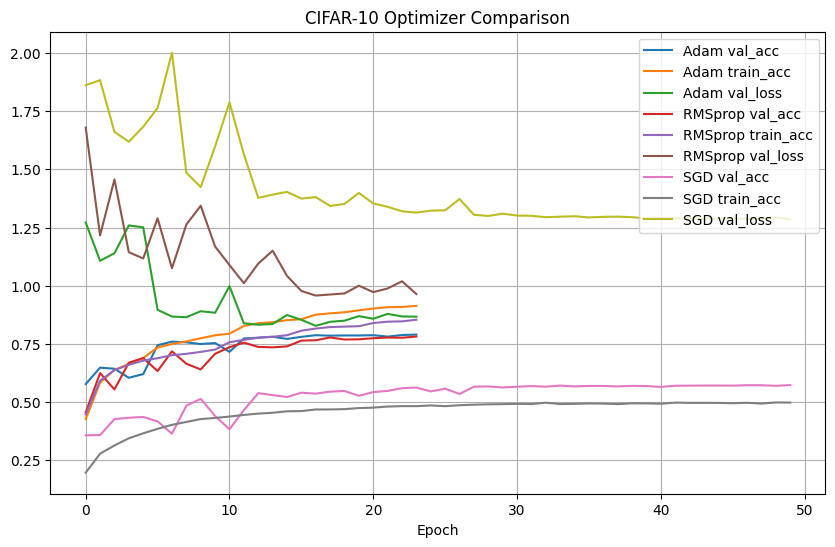

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for r in results:
    plt.plot(r['history'].history['val_accuracy'], label=f"{r['name']} val_acc")
    plt.plot(r['history'].history['accuracy'], label=f"{r['name']} train_acc")
    plt.plot(r['history'].history['val_loss'], label=f"{r['name']} val_loss")

plt.title("CIFAR-10 Optimizer Comparison")
plt.xlabel("Epoch")
plt.legend()
plt.grid(True)
plt.show()


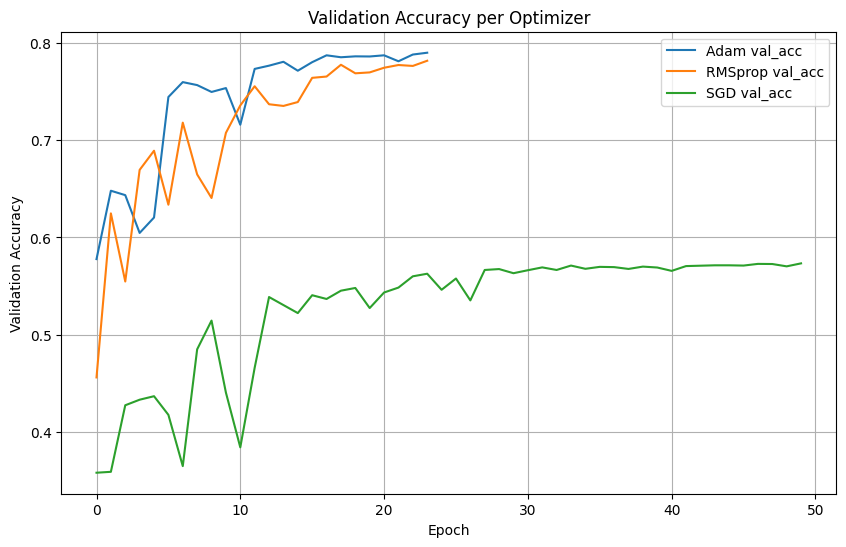

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for r in results:
    plt.plot(r['history'].history['val_accuracy'], label=f"{r['name']} val_acc")

plt.title("Validation Accuracy per Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


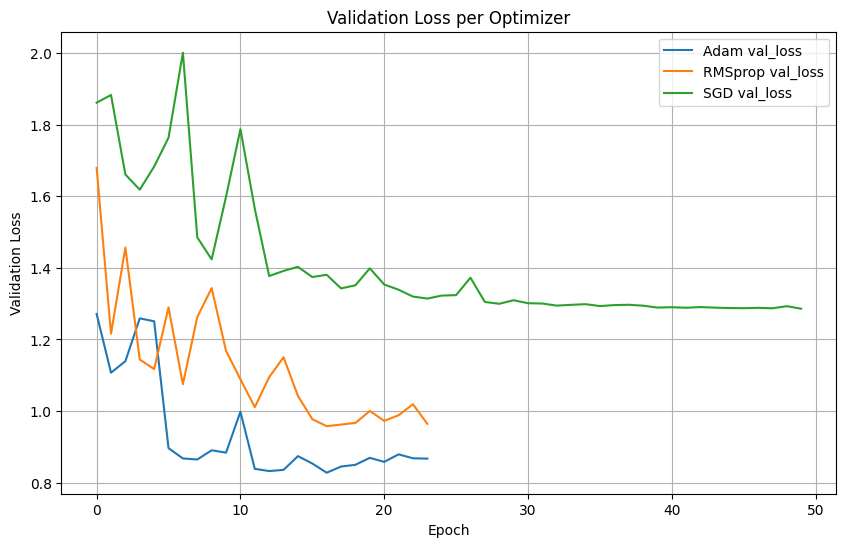

In [113]:
plt.figure(figsize=(10, 6))
for r in results:
    plt.plot(r['history'].history['val_loss'], label=f"{r['name']} val_loss")

plt.title("Validation Loss per Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


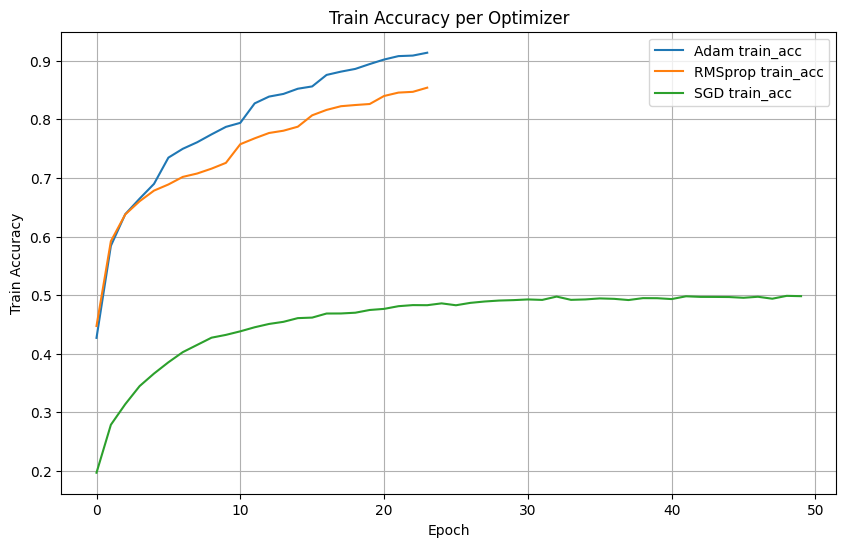

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for r in results:
    plt.plot(r['history'].history['accuracy'], label=f"{r['name']} train_acc")

plt.title("Train Accuracy per Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

    airplane       0.80      0.80      0.80      1000
  automobile       0.87      0.88      0.87      1000
        bird       0.70      0.68      0.69      1000
         cat       0.62      0.60      0.61      1000
        deer       0.75      0.79      0.77      1000
         dog       0.72      0.67      0.69      1000
        frog       0.82      0.86      0.84      1000
       horse       0.81      0.84      0.82      1000
        ship       0.87      0.85      0.86      1000
       truck       0.86      0.85      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



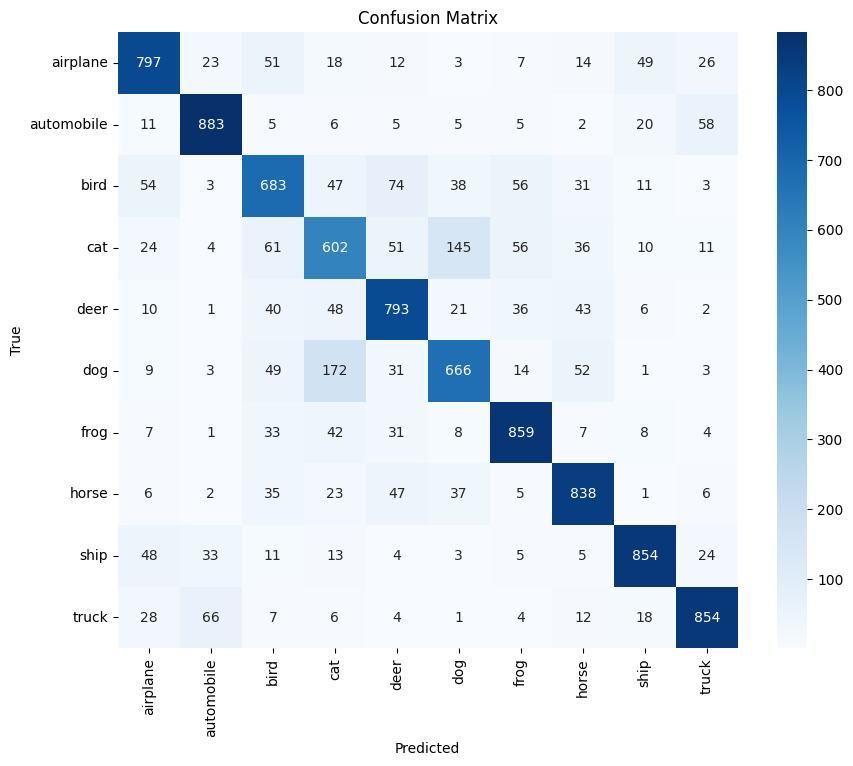

In [122]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

model = create_model()
model.load_weights("/content/drive/MyDrive/optimizer_compare/best_modelAdam.keras")

# Test verisine model tahmini
y_pred_probs = model.predict(X_test)  # Bu çıktı softmax olduğu için olasılık verir
y_pred = np.argmax(y_pred_probs, axis=1)  # En yüksek olasılığa sahip sınıfı seç
y_true = np.argmax(y_test, axis=1)       # Eğer y_test one-hot ise bunu yap

cm = confusion_matrix(y_true, y_pred)

report = classification_report(y_true, y_pred, target_names=[
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
])

print(report)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["airplane", "automobile", "bird", "cat", "deer",
                          "dog", "frog", "horse", "ship", "truck"],
            yticklabels=["airplane", "automobile", "bird", "cat", "deer",
                          "dog", "frog", "horse", "ship", "truck"])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

